### Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import pickle
import os
import matplotlib.pyplot as plt
import fonctions

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)

In [3]:
print('Liste des fichiers csv disponibles:')
display(os.listdir('./data/'))

Liste des fichiers csv disponibles:


['application_test.csv',
 '.DS_Store',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [4]:
#'.DS_Store' ?

In [5]:
# Charger les jeux de données
df_train = pd.read_csv('data/application_train.csv')
df_test = pd.read_csv('data/application_test.csv')
df_bureau = pd.read_csv('data/bureau.csv')
df_bureau_balance = pd.read_csv('data/bureau_balance.csv')
df_credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
df_installments_payments = pd.read_csv('data/installments_payments.csv')
df_pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
df_previous_application = pd.read_csv('data/previous_application.csv')

In [6]:
# Documentation
columns_description = pd.read_csv('data/HomeCredit_columns_description.csv', encoding = 'ISO-8859-1')
columns_description.head()

Unnamed: 0                         Table                 Row  \
0           1  application_{train|test}.csv          SK_ID_CURR   
1           2  application_{train|test}.csv              TARGET   
2           5  application_{train|test}.csv  NAME_CONTRACT_TYPE   
3           6  application_{train|test}.csv         CODE_GENDER   
4           7  application_{train|test}.csv        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

In [7]:
# Data description
fonctions.csv_describe(folder = glob.glob('./data/*.csv'))

Rows  Columns   %NaN  \
./data/application_test.csv                   48744      121  23.81   
./data/HomeCredit_columns_description.csv       219        5  12.15   
./data/POS_CASH_balance.csv                10001358        8   0.07   
./data/credit_card_balance.csv              3840312       23   6.65   
./data/installments_payments.csv           13605401        8   0.01   
./data/application_train.csv                 307511      122  24.40   
./data/bureau.csv                           1716428       17  13.50   
./data/previous_application.csv             1670214       37  17.98   
./data/bureau_balance.csv                  27299925        3   0.00   
./data/sample_submission.csv                  48744        2   0.00   

                                           %Duplicate  object_dtype  \
./data/application_test.csv                       0.0            16   
./data/HomeCredit_columns_description.csv         0.0             4   
./data/POS_CASH_balance.csv                       0.0             1   
./data/credit_card_balance.csv                    0.0             1   
./data/installments_payments.csv                  0.0             0   
./data/application_train.csv                      0.0            16   
./data/bureau.csv                                 0.0             3   
./data/previous_application.csv                   0.0            16   
./data/bureau_balance.csv                         0.0             1   
./data/sample_submission.csv                      0.0             0   

                                           float_dtype  int_dtype  bool_dtype  \
./data/application_test.csv                         65         40           0   
./data/HomeCredit_columns_description.csv            0          1           0   
./data/POS_CASH_balance.csv                          2          5           0   
./data/credit_card_balance.csv                      15          7           0   
./data/installments_payments.csv                     5          3           0   
./data/application_train.csv                        65         41           0   
./data/bureau.csv                                    8          6           0   
./data/previous_application.csv                     15          6           0   
./data/bureau_balance.csv                            0          2           0   
./data/sample_submission.csv                         1          1           0   

                                           MB_Memory  
./data/application_test.csv                   44.998  
./data/HomeCredit_columns_description.csv      0.008  
./data/POS_CASH_balance.csv                  610.435  
./data/credit_card_balance.csv               673.883  
./data/installments_payments.csv             830.408  
./data/application_train.csv                 286.227  
./data/bureau.csv                            222.620  
./data/previous_application.csv              471.481  
./data/bureau_balance.csv                    624.846  
./data/sample_submission.csv                   0.744

### application_train.csv

In [8]:
print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)


In [9]:
# df_test -> pas de target
# à laisser de côté pour le moments

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


********** Détection des données manquantes **********

Nombre de données manquantes dans le jeu de données = 9152465

Pourcentage de valeurs manquantes : 24.4


Valeurs manquantes par colonne : 



Nombres de valeurs manquantes  \
COMMONAREA_MEDI                                      214865   
COMMONAREA_AVG                                       214865   
COMMONAREA_MODE                                      214865   
NONLIVINGAPARTMENTS_MEDI                             213514   
NONLIVINGAPARTMENTS_MODE                             213514   
NONLIVINGAPARTMENTS_AVG                              213514   
FONDKAPREMONT_MODE                                   210295   
LIVINGAPARTMENTS_MODE                                210199   
LIVINGAPARTMENTS_MEDI                                210199   
LIVINGAPARTMENTS_AVG                                 210199   
FLOORSMIN_MODE                                       208642   
FLOORSMIN_MEDI                                       208642   
FLOORSMIN_AVG                                        208642   
YEARS_BUILD_MODE                                     204488   
YEARS_BUILD_MEDI                                     204488   
YEARS_BUILD_AVG                                      204488   
OWN_CAR_AGE                                          202929   
LANDAREA_AVG                                         182590   
LANDAREA_MEDI                                        182590   
LANDAREA_MODE                                        182590   
BASEMENTAREA_MEDI                                    179943   
BASEMENTAREA_AVG                                     179943   
BASEMENTAREA_MODE                                    179943   
EXT_SOURCE_1                                         173378   
NONLIVINGAREA_MEDI                                   169682   
NONLIVINGAREA_MODE                                   169682   
NONLIVINGAREA_AVG                                    169682   
ELEVATORS_MEDI                                       163891   
ELEVATORS_MODE                                       163891   
ELEVATORS_AVG                                        163891   
WALLSMATERIAL_MODE                                   156341   
APARTMENTS_MODE                                      156061   
APARTMENTS_MEDI                                      156061   
APARTMENTS_AVG                                       156061   
ENTRANCES_MODE                                       154828   
ENTRANCES_AVG                                        154828   
ENTRANCES_MEDI                                       154828   
LIVINGAREA_MEDI                                      154350   
LIVINGAREA_MODE                                      154350   
LIVINGAREA_AVG                                       154350   
HOUSETYPE_MODE                                       154297   
FLOORSMAX_MEDI                                       153020   
FLOORSMAX_AVG                                        153020   
FLOORSMAX_MODE                                       153020   
YEARS_BEGINEXPLUATATION_AVG                          150007   
YEARS_BEGINEXPLUATATION_MEDI                         150007   
YEARS_BEGINEXPLUATATION_MODE                         150007   
TOTALAREA_MODE                                       148431   
EMERGENCYSTATE_MODE                                  145755   
OCCUPATION_TYPE                                       96391   
EXT_SOURCE_3                                          60965   
AMT_REQ_CREDIT_BUREAU_WEEK                            41519   
AMT_REQ_CREDIT_BUREAU_DAY                             41519   
AMT_REQ_CREDIT_BUREAU_MON                             41519   
AMT_REQ_CREDIT_BUREAU_QRT                             41519   
AMT_REQ_CREDIT_BUREAU_HOUR                            41519   
AMT_REQ_CREDIT_BUREAU_YEAR                            41519   
NAME_TYPE_SUITE                                        1292   
DEF_30_CNT_SOCIAL_CIRCLE                               1021   
OBS_60_CNT_SOCIAL_CIRCLE                               1021   
DEF_60_CNT_SOCIAL_CIRCLE                               1021   
OBS_30_CNT_SOCIAL_CIRCLE                               1021   
EXT_SOURCE_2                                            660  


Heatmap des valeurs manquantes : 



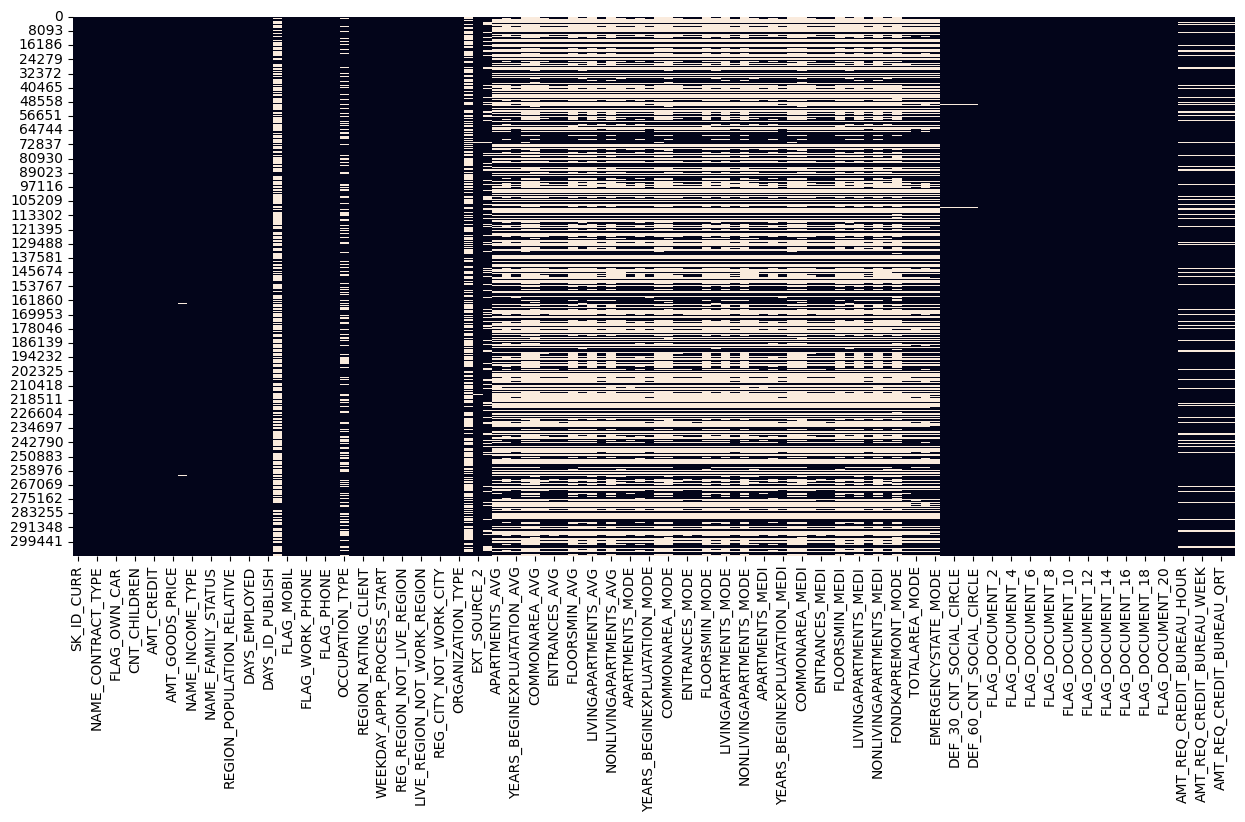

In [11]:
# Pas de duplicats mais 24% de données manquantes
# regarder le détail par colonne

fonctions.nan_detection(df_train)

In [12]:
# Distribution de la colonne "target"
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

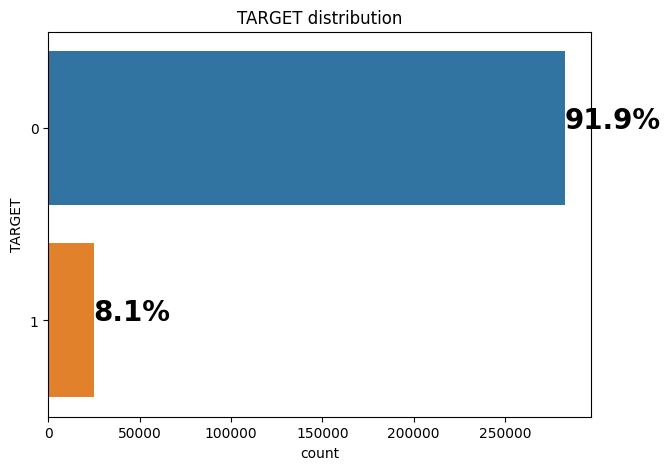

In [13]:
ax, fig = plt.subplots(figsize = (7, 5))
ax = sns.countplot(y = 'TARGET', data = df_train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(df_train['TARGET']))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize = 20, fontweight = 'bold')
        
plt.show()

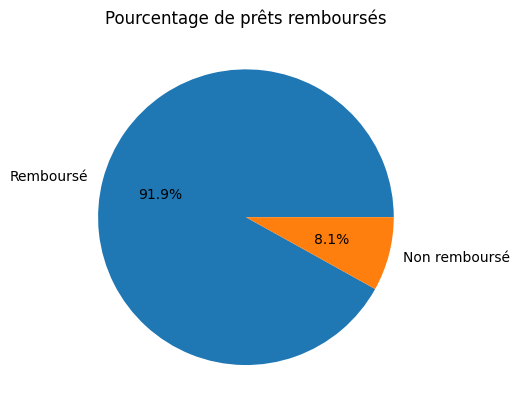

In [14]:
fig = plt.figure()
plt.pie(
    df_train['TARGET'].value_counts()/len(df_train)*100,
    autopct = '%1.1f%%',
    labels = ['Remboursé', 'Non remboursé']
       )
plt.title('Pourcentage de prêts remboursés')
plt.show()

In [15]:
# class imbalanced
# plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés à temps

# On remarque que les catégories sont trés déséquilibrées.
# Une methode tel que SMOTE, Class Weight, undersampling devra être utilisée afin de pas biaiser les résultats de l'algorithme de scoring

In [16]:
# Number of each type of column
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [17]:
# Nb of unique classes in each object column
df_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

La plupart des variables catégorielles ont un nombre relativement petit d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles…

In [18]:
df_train.select_dtypes(include = ['float64']).columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI'

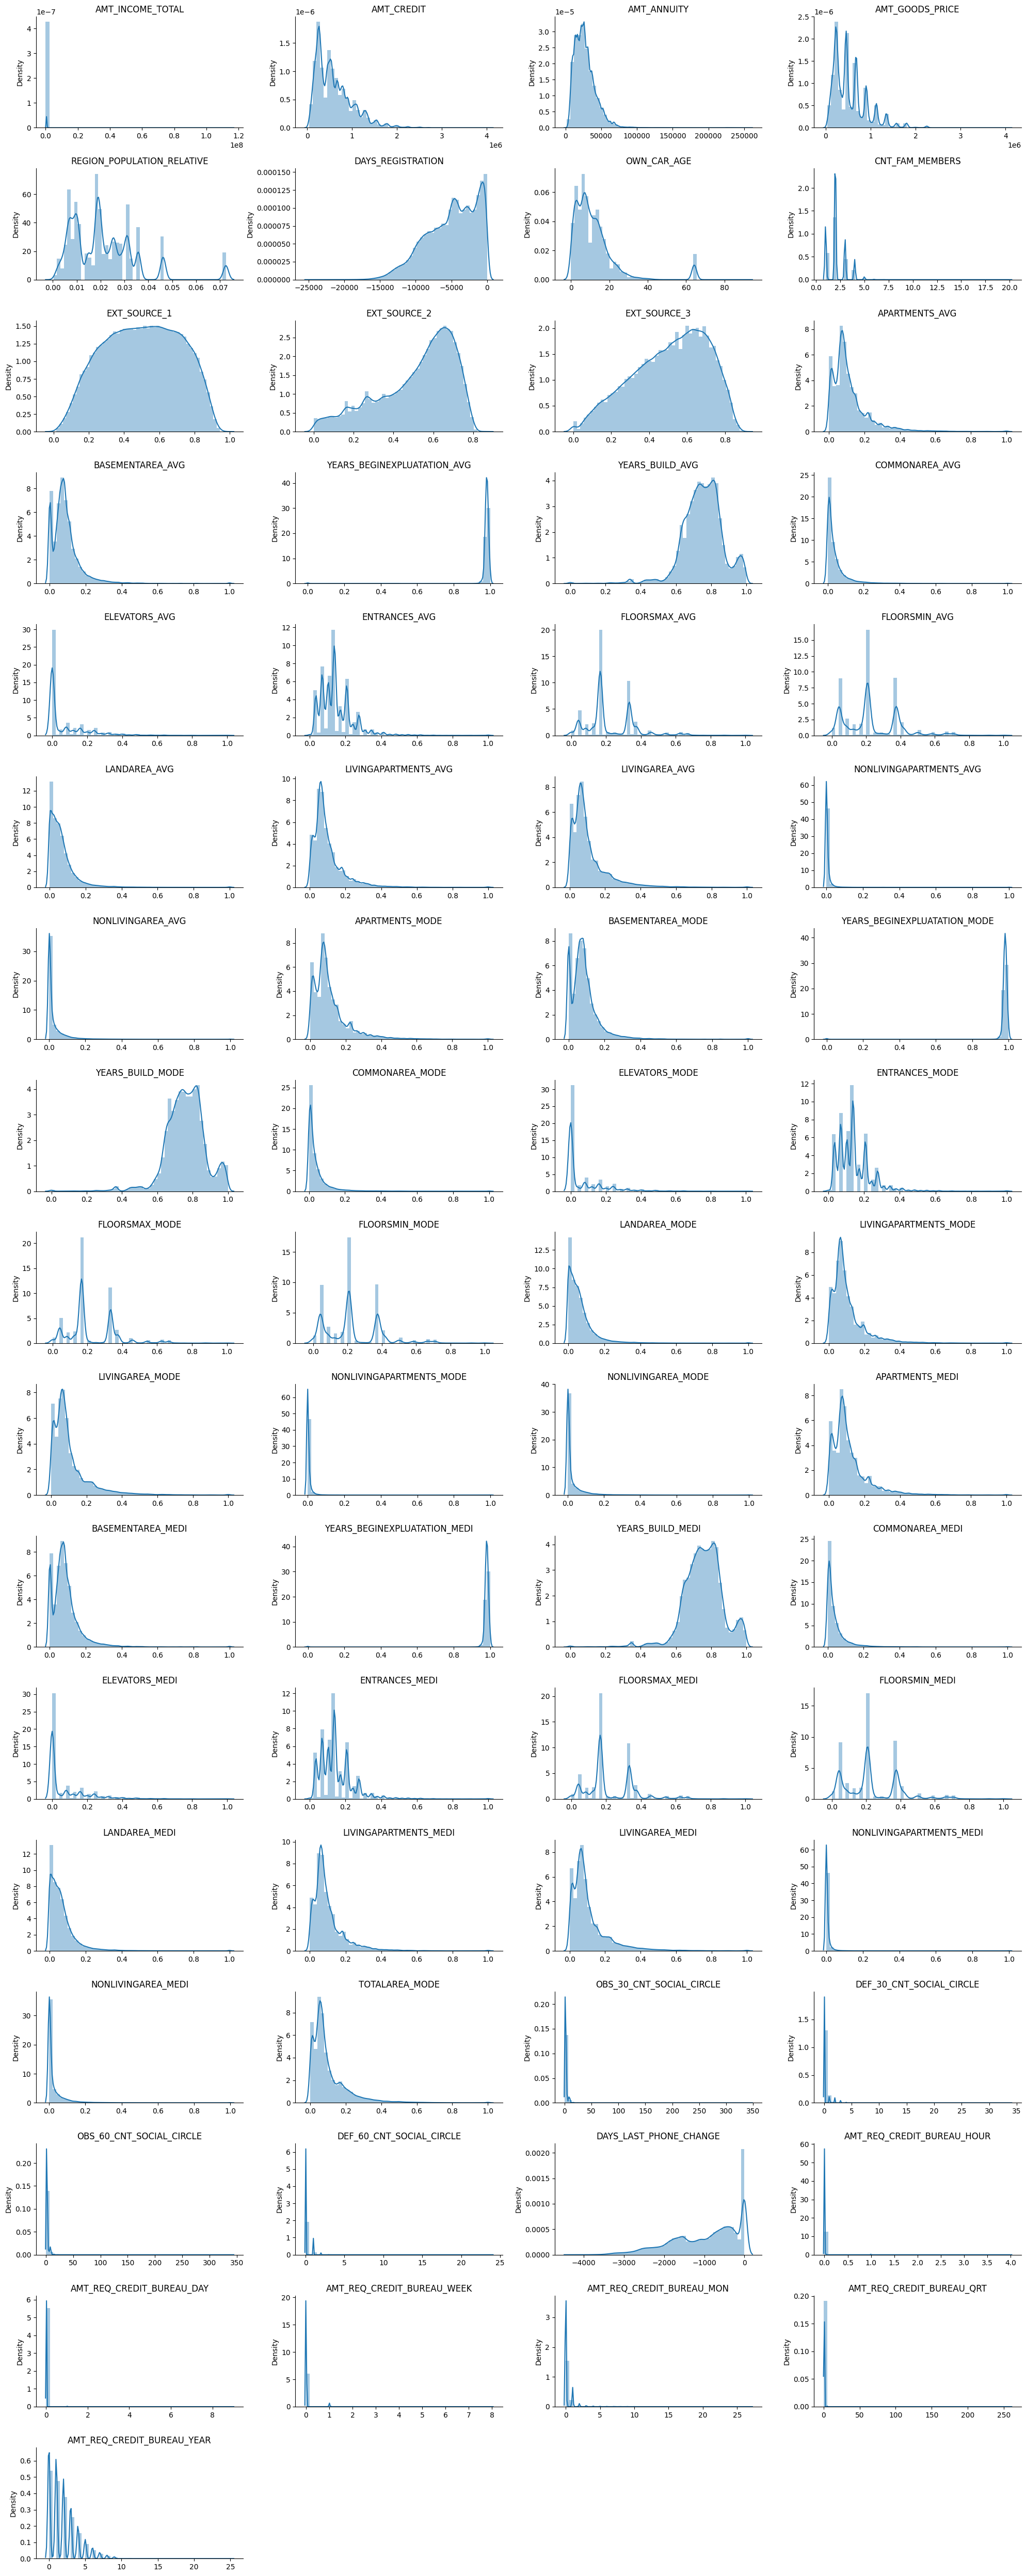

In [19]:
# Displots des variables quantitatives (variables continues seulement)

columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

nb_lignes = len(columns)/4 # 4 = nb max de displots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 50))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 4, index + 1)
    sns.distplot(x = df_train[col])
    plt.title(col)
    sns.despine() # pour enlever limites du graph en haut et à droite

figure.tight_layout()
plt.show()

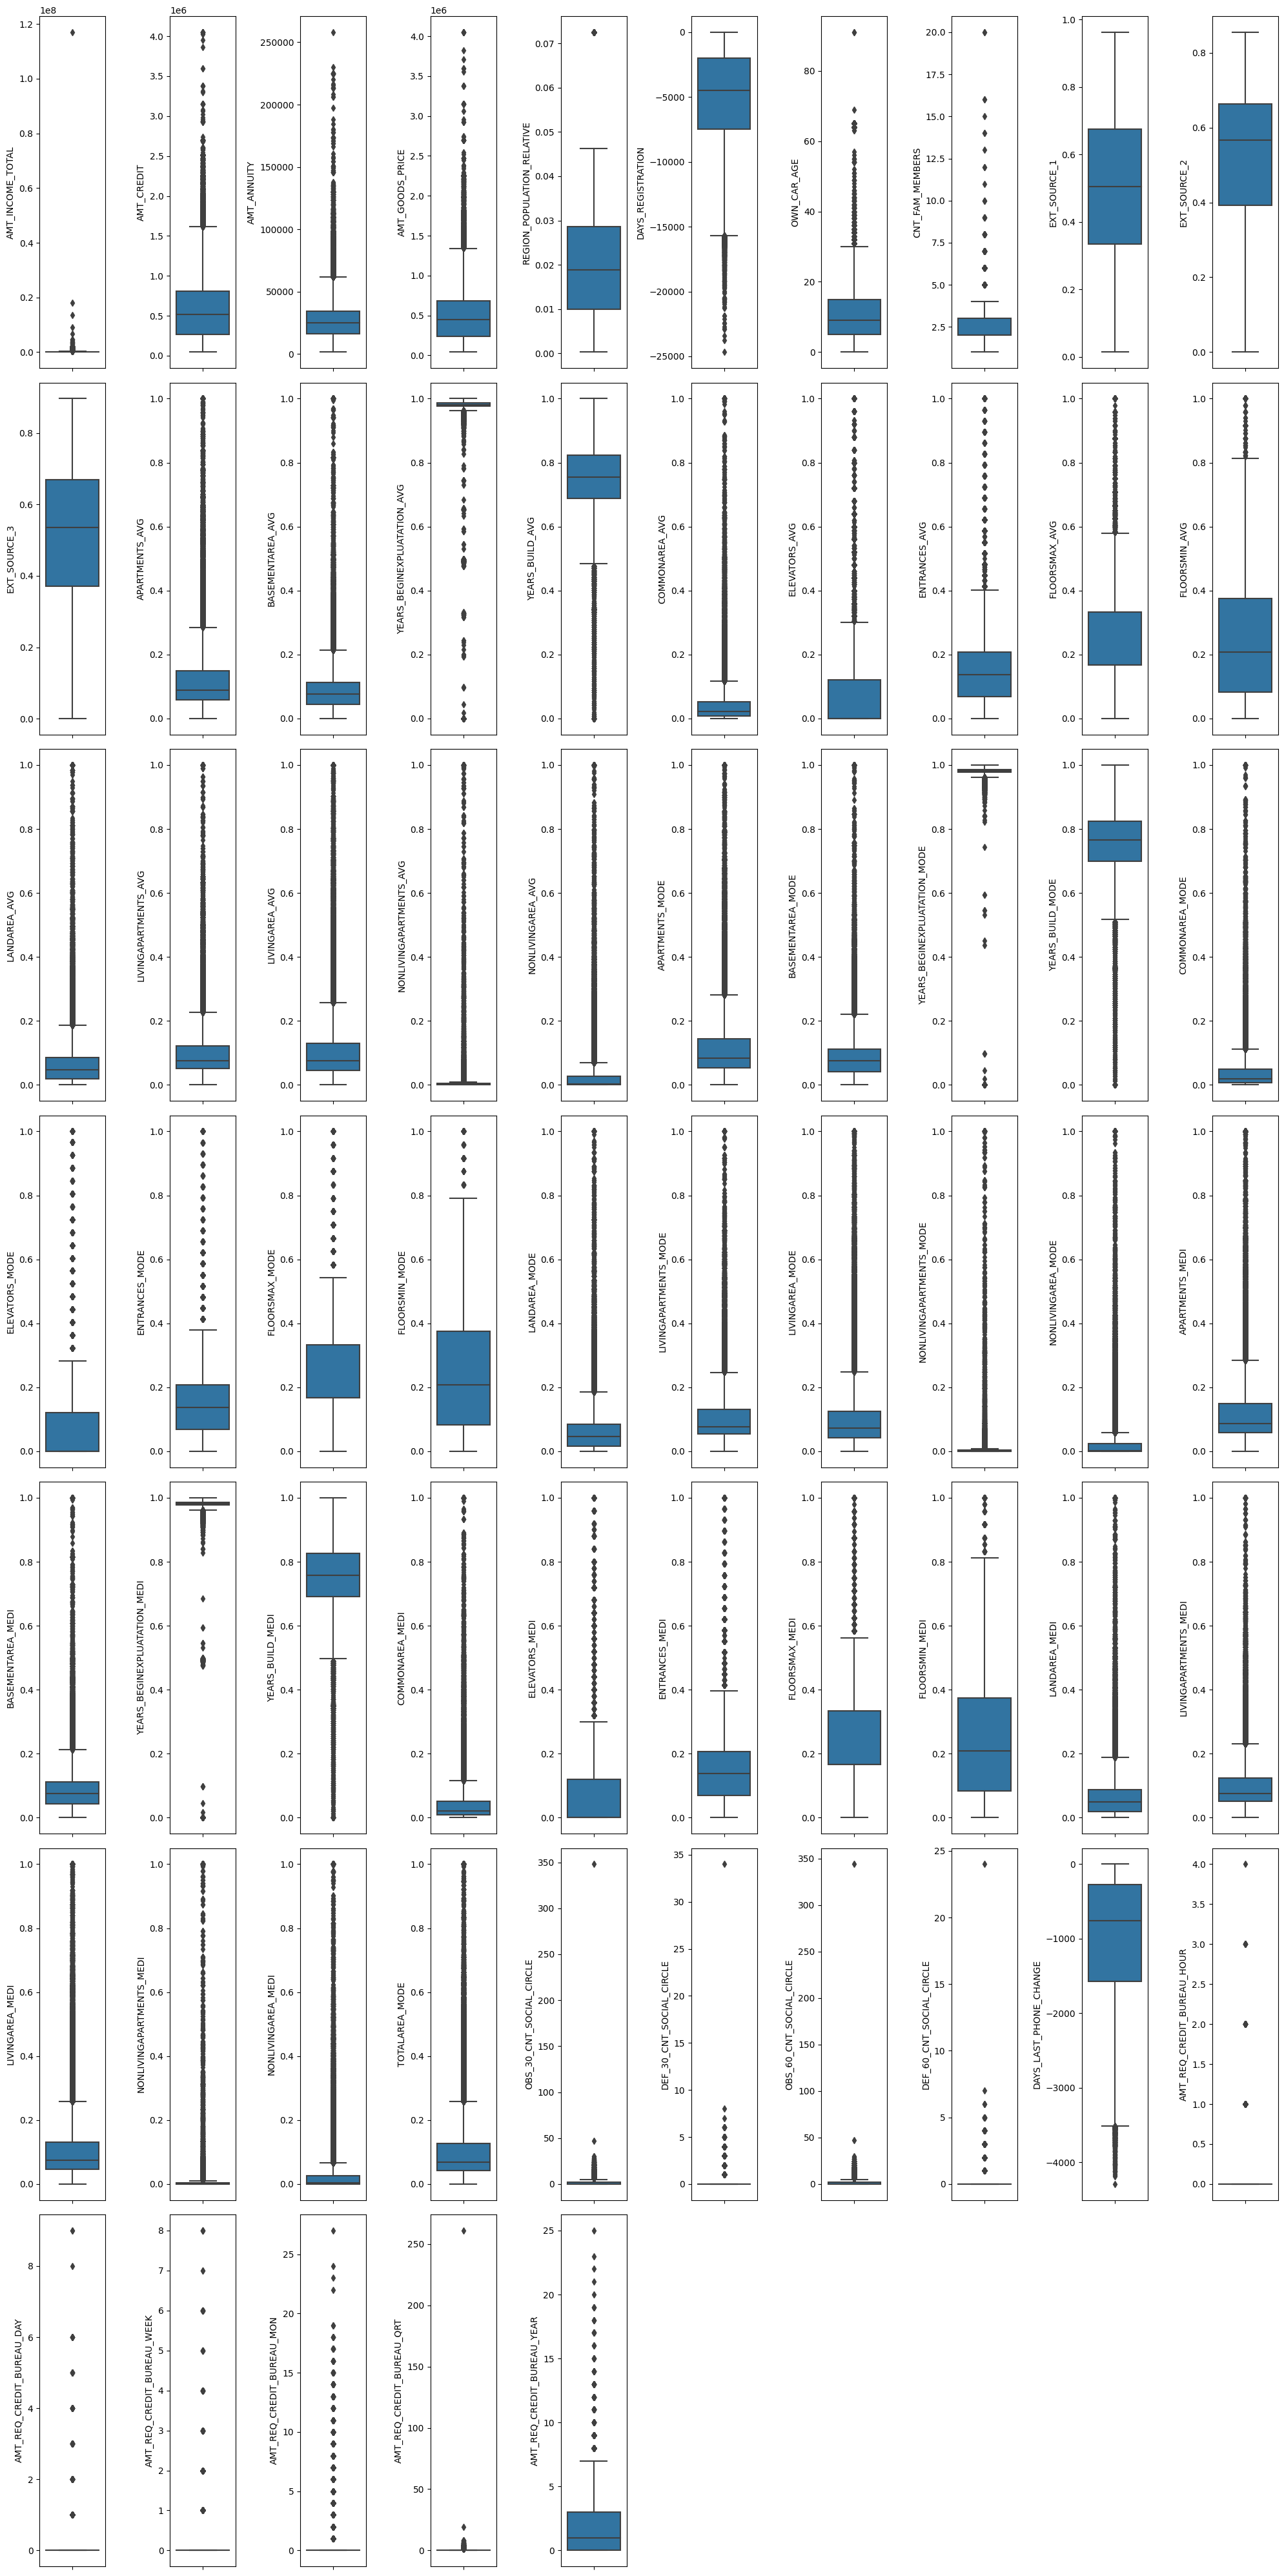

In [20]:
# Boxplots des variables quantitatives

columns = df_train.select_dtypes(include = ['float64']).columns
nb_lignes = len(columns)/10 # 10 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 40))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 10, index + 1)
    sns.boxplot(y = col, data = df_train)
figure.tight_layout()
plt.show()

### Outliers, valeurs atypiques, anormales

In [21]:
########## Genre ##########
df_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [22]:
# Supprimer le code XNA
df_train = df_train.loc[df_train['CODE_GENDER'] != 'XNA']

In [23]:
########## Statut familial ##########
df_train['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [24]:
########## Days birth ##########
(df_train['DAYS_BIRTH'] / -365).describe()

count    307507.000000
mean         43.937061
std          11.956116
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

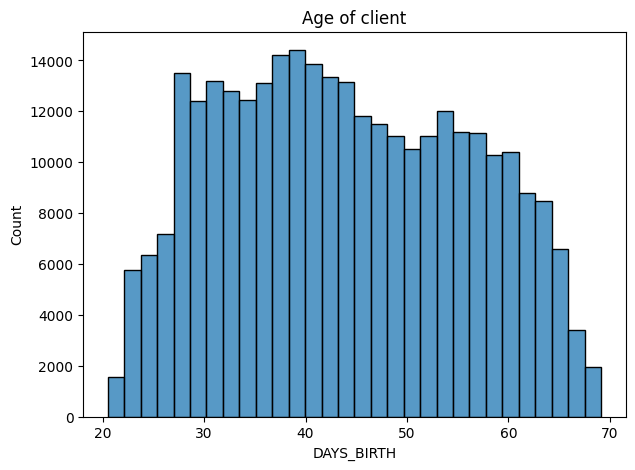

In [25]:
plt.figure(figsize = (7, 5))
sns.histplot((df_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')
plt.show()

In [26]:
# L'âge maximal est 69 et le minimal es 20 ans, il n'y a pas d'outliers.

In [27]:
########## Days employed ##########
df_train['DAYS_EMPLOYED'].describe()

count    307507.000000
mean      63815.929208
std      141276.472519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

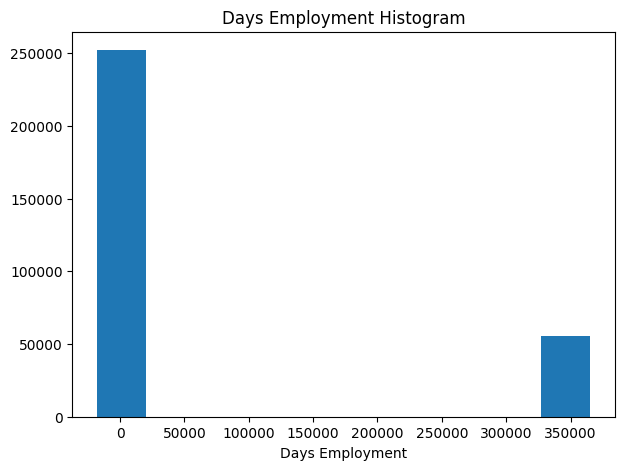

In [28]:
plt.figure(figsize = (7, 5))
plt.hist(df_train['DAYS_EMPLOYED'])
plt.title('Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

In [30]:
# 350000 jours -> 350000/365 = 959 ans -> problème quelquepart

# Création d'une variable pour indiquer quelles lignes étaient concernées par cette anomalie (clients ont peut-être renseigné de fausses infos)
df_train['DAYS_EMPLOYED_OUTLIERS'] = df_train['DAYS_EMPLOYED'] == 365243

# Remplacer les valeurs abérrantes par nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

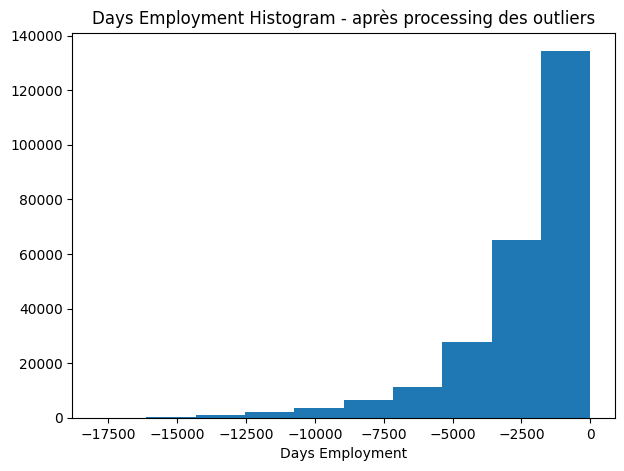

In [31]:
plt.figure(figsize = (7, 5))
plt.hist(df_train['DAYS_EMPLOYED'])
plt.title('Days Employment Histogram - après processing des outliers')
plt.xlabel('Days Employment')
plt.show()

In [ ]:
stop

In [ ]:
### Fonctions pour faciliter l'analyse des principales variables
# (trouvées dans divers notebooks en ligne)

# A DEPLACER DANS FONCTIONS.PY SI JE LES GARDE

In [ ]:
def plot_stat(data, feature, title):
    """ Fonctions pour faire blablabla """

    ax, fig = plt.subplots(figsize = (7, 5))
    ax = sns.countplot(y = feature, data = data, order=data[feature].value_counts(ascending = False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize = 14, fontweight = 'bold')

    plt.show()

In [ ]:
def plot_percent_target1(data, feature, title):

    """ Fonctions pour faire blablabla """

    cat_perc = data[[feature, 'TARGET']].groupby([feature], as_index = False).mean()
    cat_perc.sort_values(by = 'TARGET', ascending = False, inplace = True)
    
    ax, fig = plt.subplots(figsize = (7, 5))
    ax = sns.barplot(y = feature, x = 'TARGET', data = cat_perc)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('Percent of target with value 1')

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize = 14, fontweight = 'bold')

    plt.show()

**Loan types -** Distribution du type de prêts contractés + comparatif avec le pourcentage des prêts avec la valeur TARGET 1(prêt non retourné).

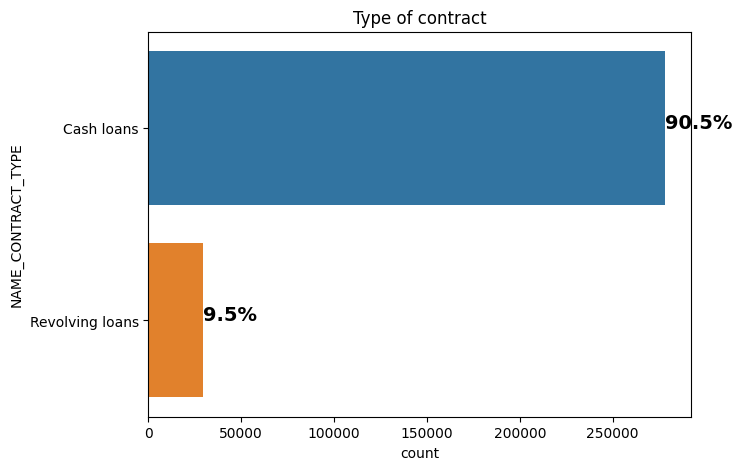

                                   -------------------------------------------------------


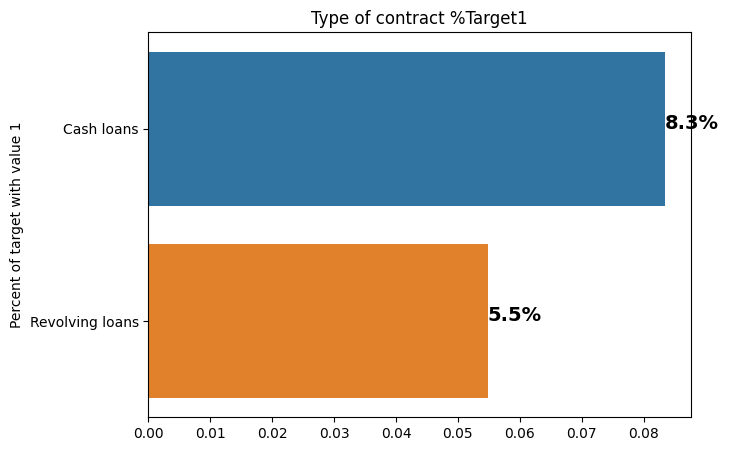

In [ ]:
#NAME_CONTRACT_TYPE
plot_stat(df_train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(df_train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

**Client gender -** Distribution H/F clients, mais aussi le pourcentage des prêts (par sexe du client) avec la valeur TARGET 1 (prêt non retourné).

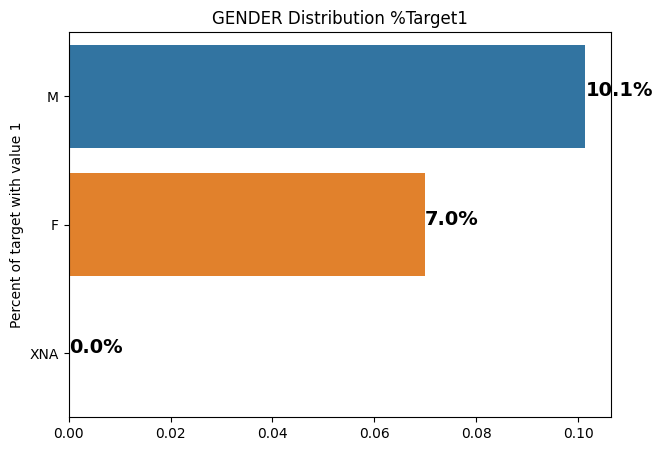

In [ ]:
#CODE_GENDER
plot_stat(df_train, 'CODE_GENDER',"GENDER Distribution")

plot_percent_target1(df_train, 'CODE_GENDER',"GENDER Distribution %Target1")

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

**Flag own car -** Distribution d'un impact possible entre les clients propriétaire d'un véhicule et ceux qui ne le sont pas…

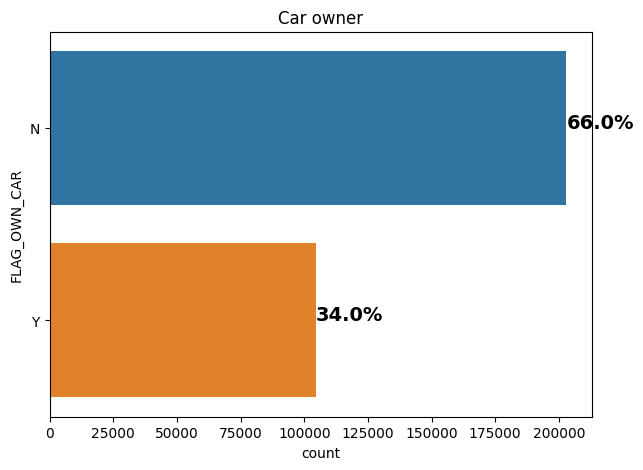

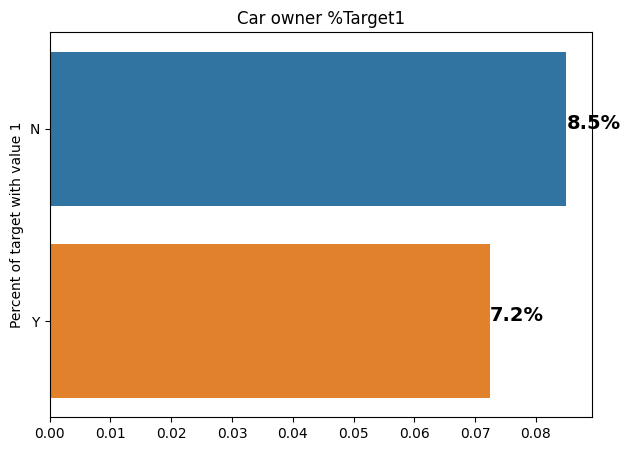

In [ ]:
#FLAG_OWN_CAR
plot_stat(df_train, 'FLAG_OWN_CAR',"Car owner")

plot_percent_target1(df_train, 'FLAG_OWN_CAR',"Car owner %Target1")

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

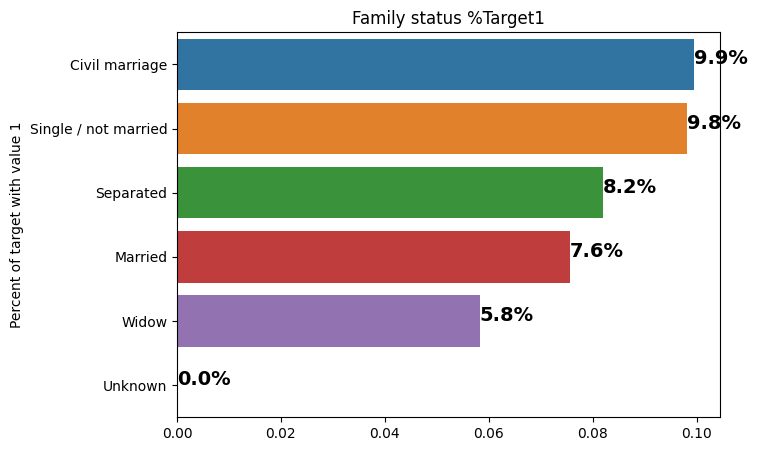

In [ ]:
#NAME_FAMILY_STATUS
plot_stat(df_train, 'NAME_FAMILY_STATUS',"Family status")

plot_percent_target1(df_train, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

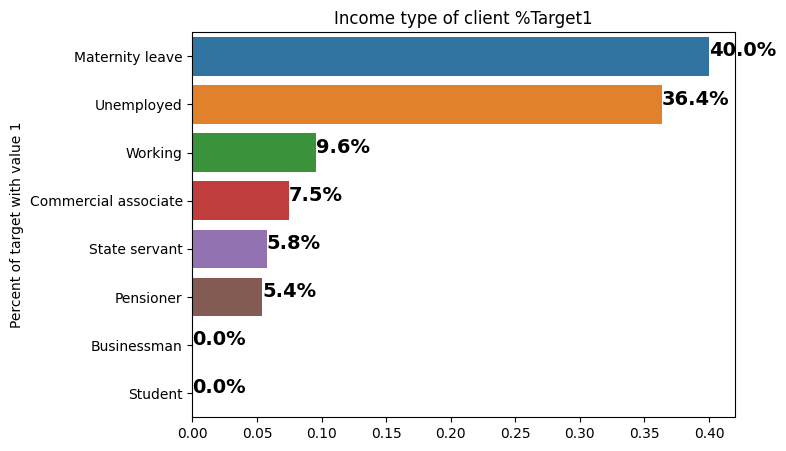

In [ ]:
#NAME_INCOME_TYPE
plot_stat(df_train, 'NAME_INCOME_TYPE',"Income type of client")

plot_percent_target1(df_train, 'NAME_INCOME_TYPE',"Income type of client %Target1")

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

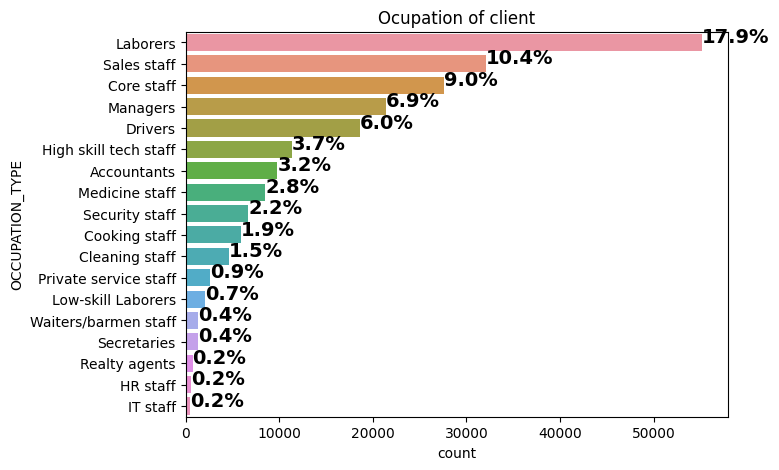

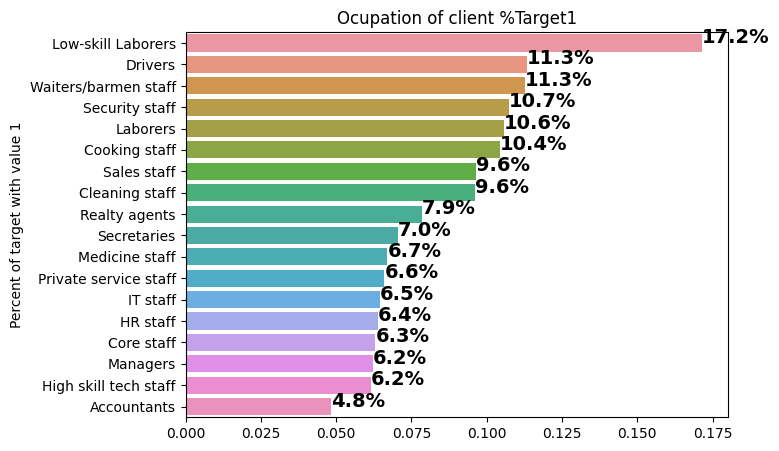

In [ ]:
#OCCUPATION_TYPE
plot_stat(df_train, 'OCCUPATION_TYPE',"Ocupation of client")

plot_percent_target1(df_train, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

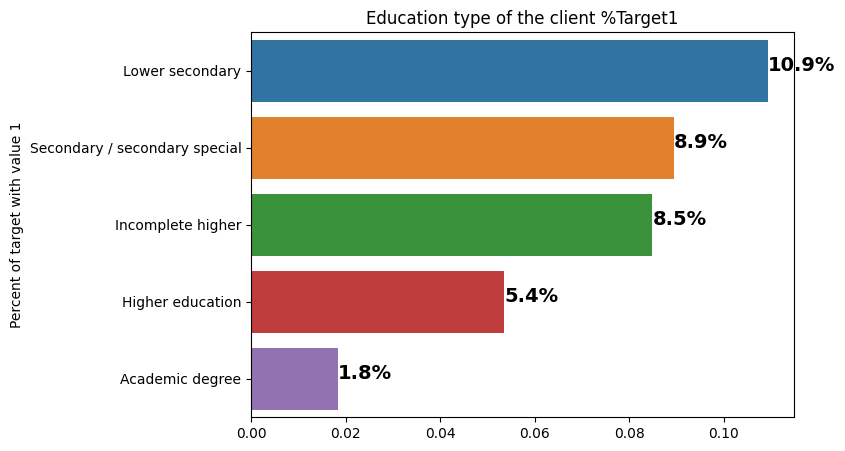

In [ ]:
#NAME_EDUCATION_TYPE
plot_stat(df_train, 'NAME_EDUCATION_TYPE',"Education type of the client")

plot_percent_target1(df_train, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")

La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

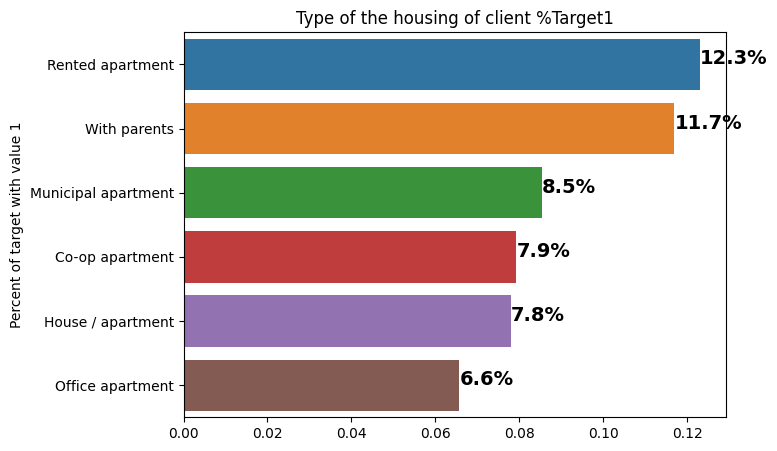

In [ ]:
#NAME_HOUSING_TYPE
plot_stat(df_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")

plot_percent_target1(df_train, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

### Corrélations
L'analyse peut continuer par une étape de traitement des corrélations entre les caractéristiques et la Target. L'idée est de calculer le coefficient de corrélation de Pearson entre chaque variable et la Target. Cette étape permet d'avoir un aperçu des relations possibles entre les variables.

In [ ]:
#Display correlations
print('Most Positive Correlations:\n', df_train.corr()['TARGET'].sort_values().tail(15))

print('Most Negative Correlations:\n', df_train.corr()['TARGET'].sort_values().head(15))

ValueError: could not convert string to float: 'Cash loans'

Notons que la corrélation la plus forte est celle de la variable 'DAYS_BIRTH'. Ceci étant, pour faciliter la compréhension est retrouver la logique vue en préambule, les jours exprimés en valeurs négatives peuvent être traités en valeurs absolues. Alors le coef. de Person sera négatif, cela expose le fait qu'un client plus âgé sera moins susceptible de faire défaut au remboursement de son crédit (cela peut sembler logique, en tout cas ce n'est pas absurde).

In [ ]:
#Find the correlation of the positive days since birth and target
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982709

En termes de distribution des âges elle peut uniquement servir à visualiser la non présence d'outliers, suite à ce qui a été fait en amont sur les valeurs négatives de départ. Pour visualiser l'effet de l'âge sur la Target, nous pouvons faire un graphique (KDE) coloré par la valeur TARGET 0 et 1.

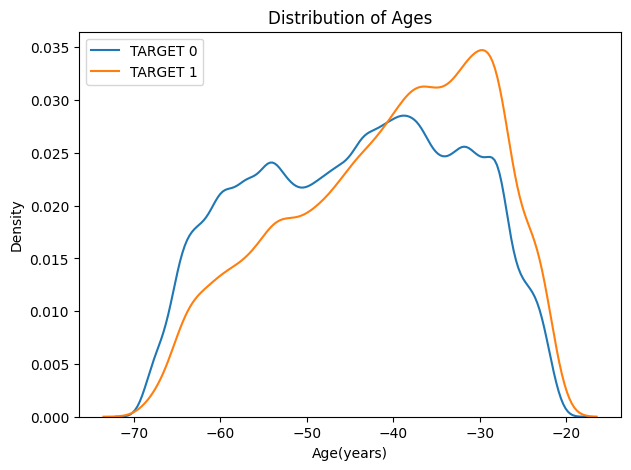

In [ ]:
plt.figure(figsize = (7, 5))
sns.kdeplot(df_train[df_train['TARGET'] == 0]['DAYS_BIRTH'] / -365, label = 'TARGET 0')
sns.kdeplot(df_train[df_train['TARGET'] == 1]['DAYS_BIRTH'] / -365, label = 'TARGET 1')

plt.legend(), plt.xlabel('Age(years)'), plt.ylabel('Density'), plt.title('Distribution of Ages')
plt.show()

La courbe cible TARGET 1 s'incline vers l'extrémité la plus jeune de la plage. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient Pearson -0,07), cette variable sera probablement utile dans un modèle d'apprentissage car elle affecte la Target.

#### Sources extérieures, les plus fortes corrélations linéaires…
Ces 3 variables (EXT_SOURCE) présentant les corrélations négatives les plus fortes avec la Target. Selon la documentation, ces fonctionnalités représentent un «score normalisé à partir d'une source de données externe». 
Difficile de comprendre le sens exact, nous pouvons émettre l'hypothèse d'une cote de crédit cumulative établie à l'aide de différentes sources de données.

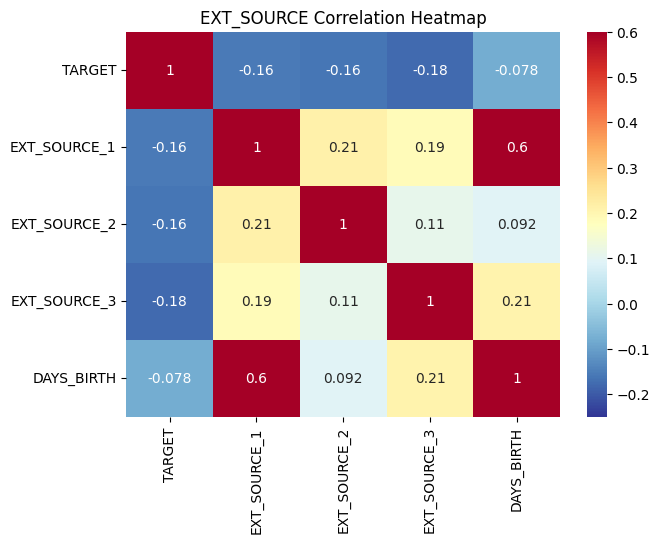

In [ ]:
#Heatmap of correlations
plt.figure(figsize = (7, 5))
sns.heatmap(df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].corr(),
            cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6,
           )
plt.title('EXT_SOURCE Correlation Heatmap')
plt.show()

Ces sources extérieures sont corrélées négativement avec la Target (Attention, négativement mais avec de très faibles coefficients). Malgré tout, on peut penser que si la valeur augmente, le client est plus susceptible de pouvoir rembourser le crédit. Notons que 'DAYS_BIRTH' est corrélée avec 'EXT_SOURCE_1', peut-être l'un des facteurs de ce score est l'âge du client.

In [ ]:
#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize = (7, 5))

    t0 = df_train.loc[df_train['TARGET'] == 0]
    t1 = df_train.loc[df_train['TARGET'] == 1]

    sns.kdeplot(t0[feature].dropna(), color = 'blue', label = "TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color = 'red', label = "TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()
    plt.show()

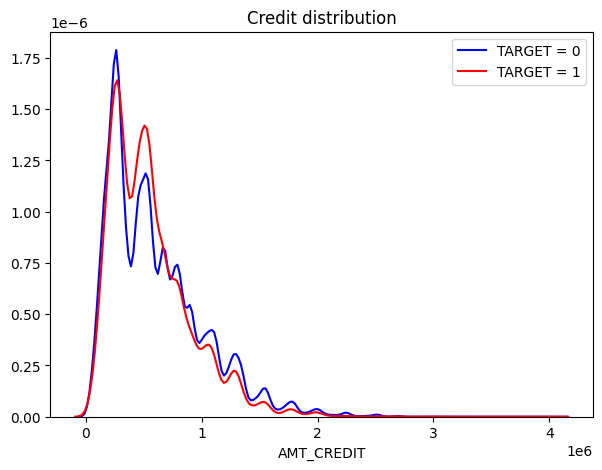

                                   -------------------------------------------------------


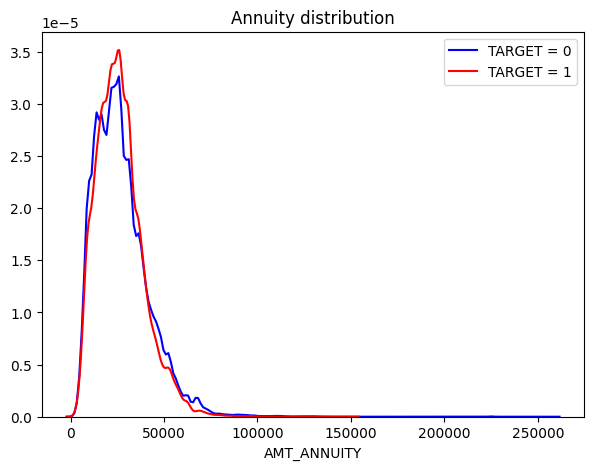

                                   -------------------------------------------------------


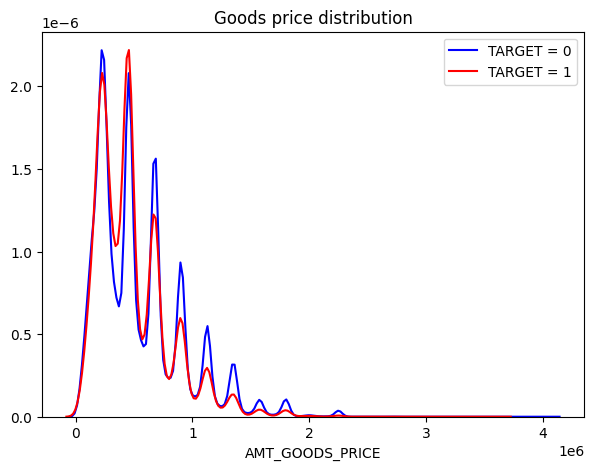

                                   -------------------------------------------------------


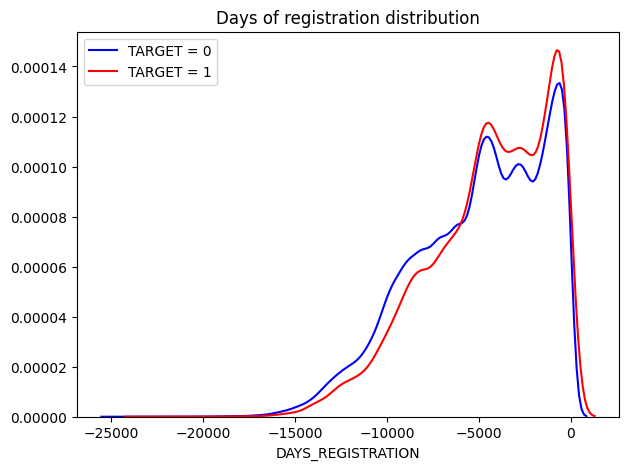

                                   -------------------------------------------------------


In [ ]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

### EDA bureau.csv

``Bureau data``

Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [ ]:
application_bureau_train = df_train.merge(df_bureau, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')

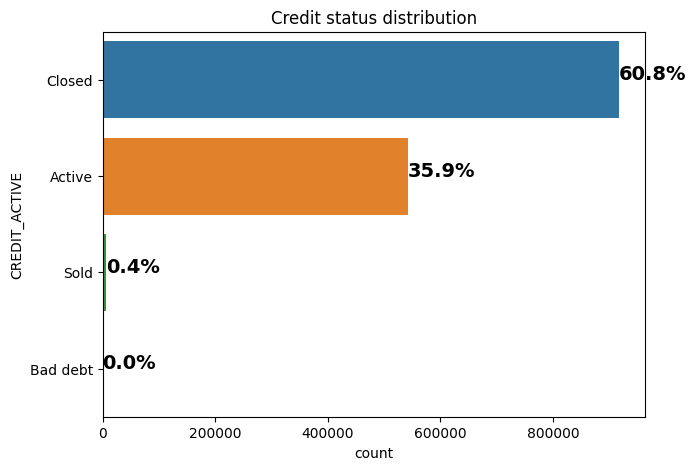

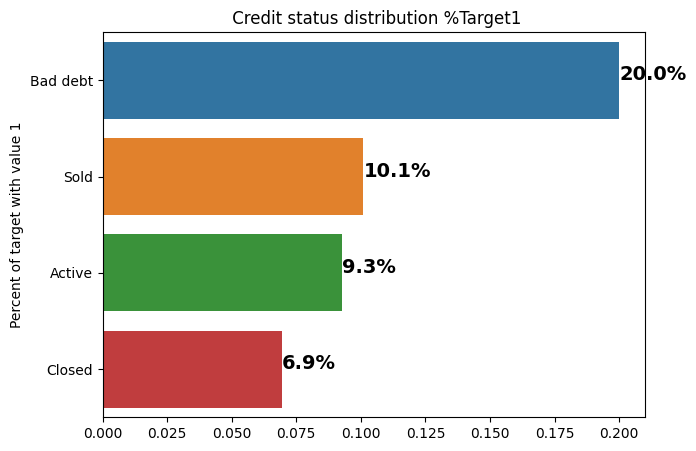

In [ ]:
#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE', "Credit status distribution")

plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE'," Credit status distribution %Target1")

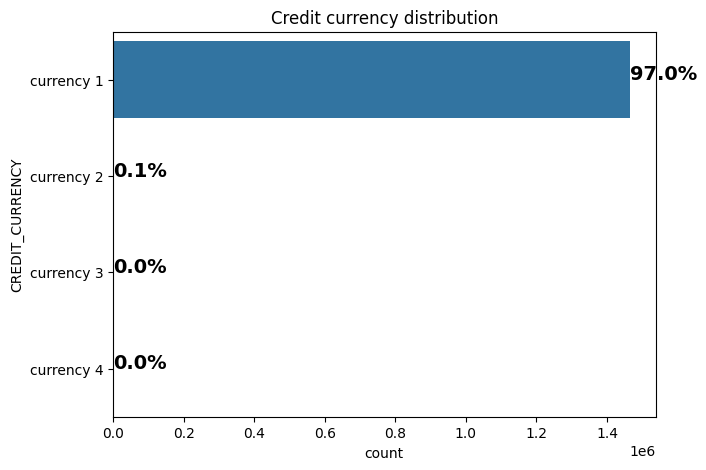

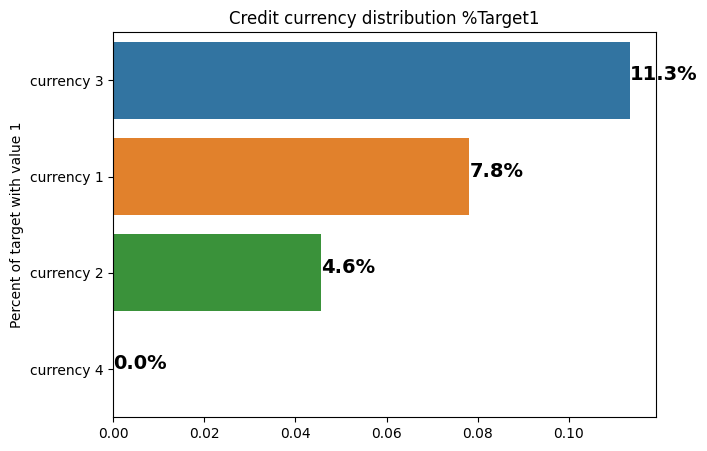

In [ ]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY', "Credit currency distribution")

plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY', "Credit currency distribution %Target1")

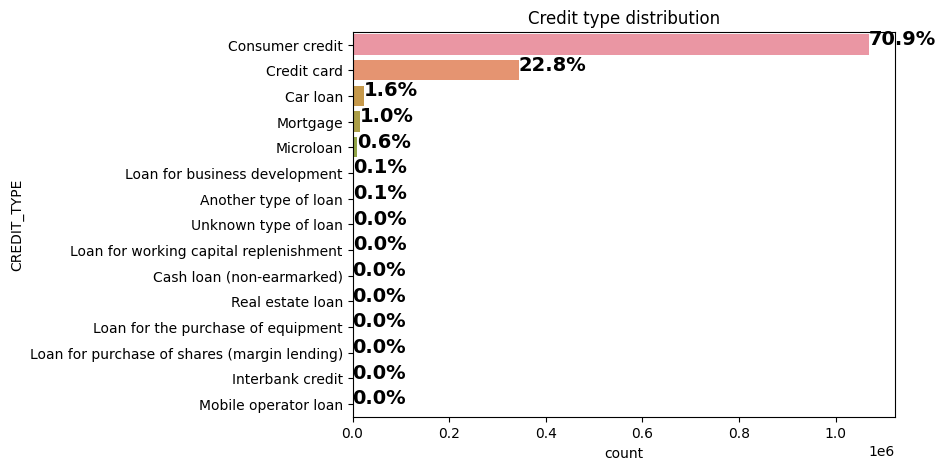

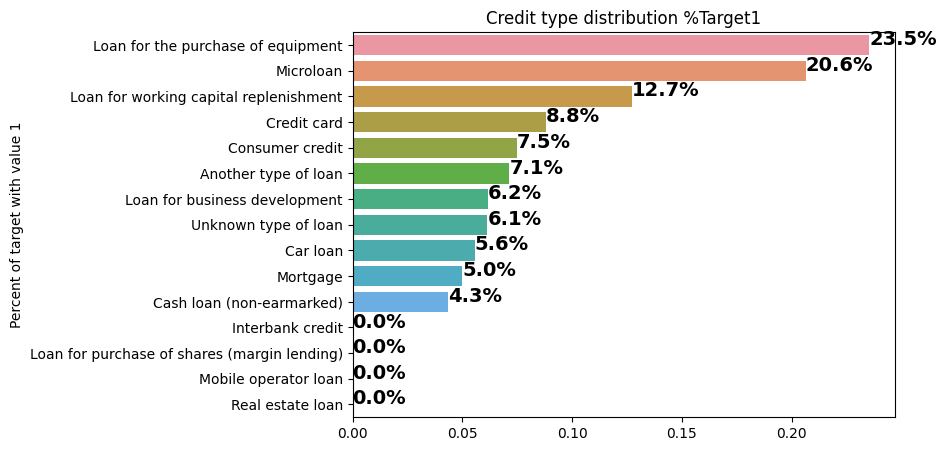

In [ ]:
#CREDIT_TYPE
plot_stat(application_bureau_train, 'CREDIT_TYPE', "Credit type distribution")

plot_percent_target1(application_bureau_train, 'CREDIT_TYPE', "Credit type distribution %Target1")

### EDA previous_application.csv

``Previous application data``

"previous_application" contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des prêts dans l'échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données. SK_ID_CURR est la clé reliant les données application_train | test aux données previous_application.


Il est nécessaire de fusionner "application_train" avec "previous_application" pour pour pouvoir extraire la part de TARGET == 1.

In [ ]:
application_prev_train = df_train.merge(previous_application, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'left')

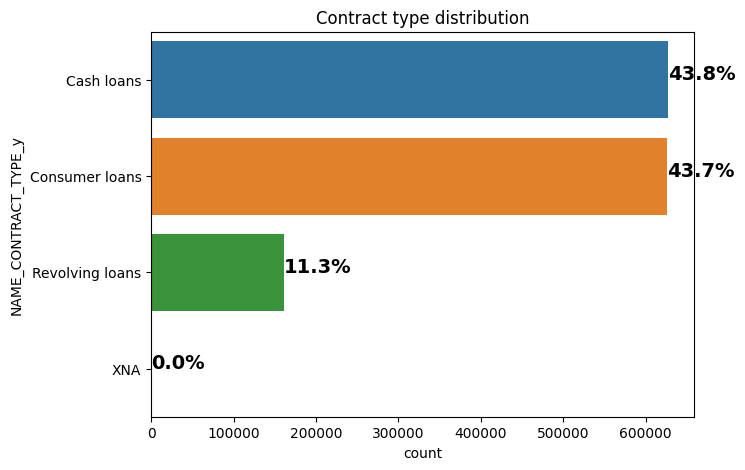

In [ ]:
#NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")

plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution %Target1")

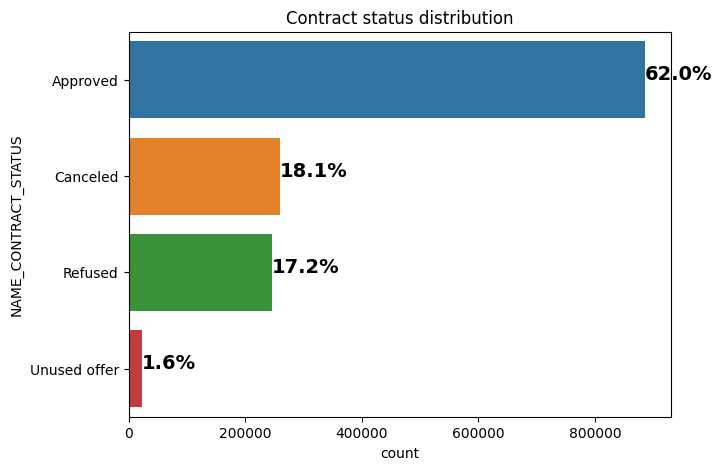

In [ ]:
#NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS', "Contract status distribution")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS', "Contract status distribution %Target1")

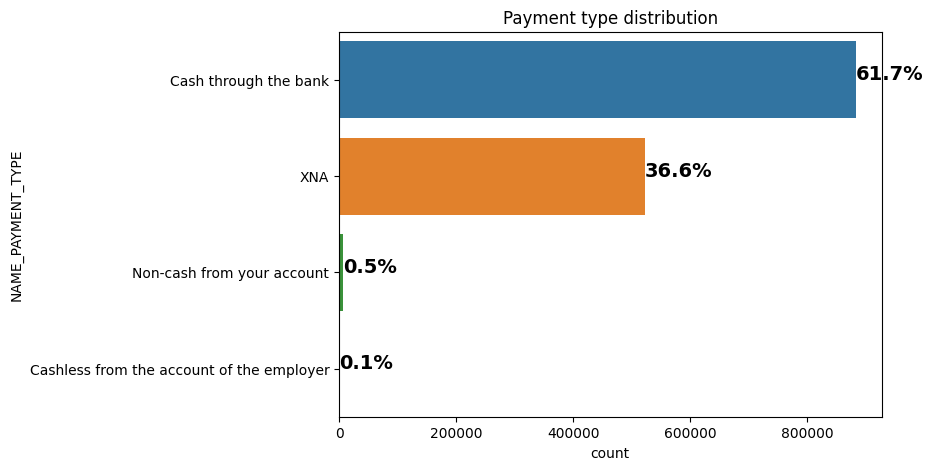

In [ ]:
#NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE', "Payment type distribution")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE', "Payment type distribution %Target1")

Le mode de paiement se fait majoritairement en Cash via la banque. Le remboursement du crédit en cas de défaillance (Target 1) ne se dintingue sur aucun type de paiement, l'égalité est quasi parfaite.

In [ ]:
#NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE', "Client type distribution")

plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE', "Client type distribution %Target1")

## Merging et agrégations des données
Indispensable d'avoir une réflexion et une étape d'agrégation des données. Des informations complémentaires aux principaux fichiers peuvent en effet avoir un impact dans nos modélisations. Voyons comment traiter l'ensemble des jeux de données…

In [ ]:
#Create a simple dataset with the train / test merge app
data = pd.merge(application_train, application_test, on = 'SK_ID_CURR', how = 'left')
data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER_x FLAG_OWN_CAR_x  \
0           100002       1           Cash loans             M              N   
1           100003       0           Cash loans             F              N   
2           100004       0      Revolving loans             M              Y   
3           100006       0           Cash loans             F              N   
4           100007       0           Cash loans             M              N   
...            ...     ...                  ...           ...            ...   
307506      456251       0           Cash loans             M              N   
307507      456252       0           Cash loans             F              N   
307508      456253       0           Cash loans             F              N   
307509      456254       1           Cash loans             F              N   
307510      456255       0           Cash loans             F              N   

       FLAG_OWN_REALTY_x  CNT_CHILDREN_x  AMT_INCOME_TOTAL_x  AMT_CREDIT_x  \
0                      Y               0            202500.0      406597.5   
1                      N               0            270000.0     1293502.5   
2                      Y               0             67500.0      135000.0   
3                      Y               0            135000.0      312682.5   
4                      Y               0            121500.0      513000.0   
...                  ...             ...                 ...           ...   
307506                 N               0            157500.0      254700.0   
307507                 Y               0             72000.0      269550.0   
307508                 Y               0            153000.0      677664.0   
307509                 Y               0            171000.0      370107.0   
307510                 N               0            157500.0      675000.0   

        AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x  \
0             24700.5           351000.0     Unaccompanied   
1             35698.5          1129500.0            Family   
2              6750.0           135000.0     Unaccompanied   
3             29686.5           297000.0     Unaccompanied   
4             21865.5           513000.0     Unaccompanied   
...               ...                ...               ...   
307506        27558.0           225000.0     Unaccompanied   
307507        12001.5           225000.0     Unaccompanied   
307508        29979.0           585000.0     Unaccompanied   
307509        20205.0           319500.0     Unaccompanied   
307510        49117.5           675000.0     Unaccompanied   

          NAME_INCOME_TYPE_x          NAME_EDUCATION_TYPE_x  \
0                    Working  Secondary / secondary special   
1              State servant               Higher education   
2                    Working  Secondary / secondary special   
3                    Working  Secondary / secondary special   
4                    Working  Secondary / secondary special   
...                      ...                            ...   
307506               Working  Secondary / secondary special   
307507             Pensioner  Secondary / secondary special   
307508               Working               Higher education   
307509  Commercial associate  Secondary / secondary special   
307510  Commercial associate               Higher education   

        NAME_FAMILY_STATUS_x NAME_HOUSING_TYPE_x  \
0       Single / not married   House / apartment   
1                    Married   House / apartment   
2       Single / not married   House / apartment   
3             Civil marriage   House / apartment   
4       Single / not married   House / apartment   
...                      ...                 ...   
307506             Separated        With parents   
307507                 Widow   House / apartment   
307508             Separated   House / apartment   
307509               Married   House / apartment   
307510               Married   House

Les deux jeux de données ont exactement le même format avec une seule différence, la TARGET dispo dans le train.

In [ ]:
print('Train:' + str(application_train.shape))
print('Test:' + str(application_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 123)
Test:(48744, 121)
>>> Data:(307511, 243)


In [ ]:
#Now just in case, let's check if we've got it right
data.TARGET.isna().sum()

0

A partir du fichier ``bureau.csv``, il est possible d'extraire un historique sur les précédents crédits enregistrés par les clients. Il peut donc être intéressant d'enrichir l'échantillon avec ce type de données.

``bureau : bureau.csv``

In [ ]:
display(bureau.head())
display(bureau.shape)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

(1716428, 17)

Calcul du nombre total des précédents crédits pris par chaque client. Ce type d'information viendra enrichir l'échantillon de travail… 

In [ ]:
#Total number of previous credits taken by each customer
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

SK_ID_CURR  PREVIOUS_LOANS_COUNT
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [ ]:
#Merge this new column in our data sample
data = data.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')
data.shape

(307511, 244)

``bureau_balance : bureau_balance.csv``

In [ ]:
display(bureau_balance.head())
display(bureau_balance.shape)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

(27299925, 3)

In [ ]:
#Monthly average balances of previous credits in Credit Bureau.
bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU', as_index = False).agg({'MONTHS_BALANCE' : 'mean', 'STATUS' : 'first'}).rename(columns = {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()

SK_ID_BUREAU  MONTHS_BALANCE_MEAN STATUS
0       5001709                -48.0      C
1       5001710                -41.0      C
2       5001711                 -1.5      X
3       5001712                 -9.0      C
4       5001713                -10.5      X

In [ ]:
bureau_full = bureau.merge(bureau_bal_mean, on = 'SK_ID_BUREAU', how = 'inner')
bureau_full.drop('SK_ID_BUREAU', axis = 1, inplace = True)
display(bureau_full.head())
display(bureau_full.shape)

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      380361        Active      currency 1         -820                   0   
1      380361        Active      currency 1         -357                   0   
2      380361        Closed      currency 1         -917                   0   
3      380361        Closed      currency 1         -993                   0   
4      380361        Closed      currency 1        -1146                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0              31069.0                NaN                     NaN   
1               1119.0                NaN                     NaN   
2               -187.0             -759.0                     NaN   
3              31039.0             -831.0                     NaN   
4                681.0             -780.0                     NaN   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         67500.0                  0.0   
1                   0         45000.0                  0.0   
2                   0         74439.0                  0.0   
3                   0        315000.0                  0.0   
4                   0       2025000.0                  0.0   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0               67500.0                     0.0      Credit card   
1               45000.0                     0.0      Credit card   
2                   0.0                     0.0  Consumer credit   
3                   0.0                     0.0      Credit card   
4                   0.0                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MEAN STATUS  
0                -183          0.0                -13.0      C  
1                -130       2691.0                 -5.5      C  
2                -748          0.0                -17.5      C  
3                -818          0.0                -16.0      C  
4                -769          0.0                -18.5      C

(774354, 18)

In [ ]:
bureau_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774354 entries, 0 to 774353
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              774354 non-null  int64  
 1   CREDIT_ACTIVE           774354 non-null  object 
 2   CREDIT_CURRENCY         774354 non-null  object 
 3   DAYS_CREDIT             774354 non-null  int64  
 4   CREDIT_DAY_OVERDUE      774354 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     723869 non-null  float64
 6   DAYS_ENDDATE_FACT       490889 non-null  float64
 7   AMT_CREDIT_MAX_OVERDUE  234704 non-null  float64
 8   CNT_CREDIT_PROLONG      774354 non-null  int64  
 9   AMT_CREDIT_SUM          774349 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     662000 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    477791 non-null  float64
 12  AMT_CREDIT_SUM_OVERDUE  774354 non-null  float64
 13  CREDIT_TYPE             774354 non-null  object 
 14  DAYS_CREDIT_UPDATE  

In [ ]:
bureau_full.columns

Index(['SK_ID_CURR', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE',
       'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY',
       'MONTHS_BALANCE_MEAN', 'STATUS'],
      dtype='object')

In [ ]:
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index = False).agg({
    'CREDIT_ACTIVE' : 'first',
    'CREDIT_CURRENCY': 'first',
    'DAYS_CREDIT' : 'mean',
    'CREDIT_DAY_OVERDUE' : 'mean',
    'DAYS_CREDIT_ENDDATE' : 'mean',
    'DAYS_ENDDATE_FACT' : 'mean',
    'AMT_CREDIT_MAX_OVERDUE' : 'mean',
    'CNT_CREDIT_PROLONG' : 'mean',
    'AMT_CREDIT_SUM' : 'mean',
    'AMT_CREDIT_SUM_DEBT' : 'mean',
    'AMT_CREDIT_SUM_LIMIT' : 'mean',
    'AMT_CREDIT_SUM_OVERDUE' : 'mean',
    'CREDIT_TYPE' : 'first',
    'DAYS_CREDIT_UPDATE' : 'mean',
    'AMT_ANNUITY' : 'mean',
    'MONTHS_BALANCE_MEAN' : 'mean',
    'STATUS' : 'first'
    }).add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape

(134542, 18)

In [ ]:
#Merge all this features with our data sample
data = data.merge(bureau_mean, on = 'SK_ID_CURR', how = 'left')
data.shape

(307511, 261)

Notons l'enrichissement avec 13 nouvelles features, créées et ajoutées à notre ensemble de données application train/test appelé ``data``.

``previous_application``

Vérification des valeurs de 'SK_ID_CURR' entre data et previous_application…

In [ ]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

(1670214, 37)

In [ ]:
#Check 
len(previous_application.SK_ID_CURR.isin(data.SK_ID_CURR)) == len(previous_application)

True

Comme précédemment, commençons par quantifier le nombre de demandes précédentes des clients au crédit immobilier et ajoutons cette données à l'échantillon.

In [ ]:
#Number of previous applications of the clients to Home Credit
previous_application_counts = previous_application.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

SK_ID_CURR  PREVIOUS_APPLICATION_COUNT
0      100001                           1
1      100002                           1
2      100003                           3
3      100004                           1
4      100005                           2

In [ ]:
#Merge this new column in our data sample
data = data.merge(previous_application_counts, on = 'SK_ID_CURR', how = 'left')
data.shape

(307511, 262)

``credit_card_balance``

In [ ]:
display(credit_card_balance.head())
display(credit_card_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

(3840312, 23)

In [ ]:
credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [ ]:
credit_card_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [ ]:
credit_card_balance.columns

Index(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [ ]:
credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV', as_index = False).agg({
    'MONTHS_BALANCE' : 'mean',
    'AMT_BALANCE' : 'mean',
    'AMT_CREDIT_LIMIT_ACTUAL' : 'mean',
    'AMT_DRAWINGS_ATM_CURRENT' : 'mean',
    'AMT_DRAWINGS_CURRENT' : 'mean',
    'AMT_DRAWINGS_OTHER_CURRENT' : 'mean',
    'AMT_DRAWINGS_POS_CURRENT' : 'mean',
    'AMT_INST_MIN_REGULARITY' : 'mean',
    'AMT_PAYMENT_CURRENT' : 'mean',
    'AMT_PAYMENT_TOTAL_CURRENT' : 'mean',
    'AMT_RECEIVABLE_PRINCIPAL' : 'mean',
    'AMT_RECIVABLE' : 'mean',
    'AMT_TOTAL_RECEIVABLE' : 'mean',
    'CNT_DRAWINGS_ATM_CURRENT' : 'mean',
    'CNT_DRAWINGS_CURRENT' : 'mean',
    'CNT_DRAWINGS_OTHER_CURRENT' : 'mean',
    'CNT_DRAWINGS_POS_CURRENT' : 'mean',
    'CNT_INSTALMENT_MATURE_CUM' : 'mean',
    'NAME_CONTRACT_STATUS' : 'first',
    'SK_DPD' : 'mean',
    'SK_DPD_DEF' : 'mean'
}).add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
credit_card_balance_mean.shape

(104307, 22)

In [ ]:
#Merge with previous_application
previous_application = previous_application.merge(credit_card_balance_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 58)

``installments_payments``

In [ ]:
display(installments_payments.head())
display(installments_payments.shape)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

(13605401, 8)

In [ ]:
installments_payments.drop('SK_ID_CURR', axis = 1, inplace = True)

In [ ]:
install_pay_mean = installments_payments.groupby('SK_ID_PREV', as_index = False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
install_pay_mean.shape

(997752, 7)

In [ ]:
#Merge with previous_application
previous_application = previous_application.merge(install_pay_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 64)

``POS_CASH_balance``

In [ ]:
display(POS_CASH_balance.head())
display(POS_CASH_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

(10001358, 8)

In [ ]:
POS_CASH_balance.drop('SK_ID_CURR', axis = 1, inplace = True)

In [ ]:
POS_mean = installments_payments.groupby('SK_ID_PREV', as_index = False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace = True)
POS_mean.shape

(997752, 7)

In [ ]:
#Merge with previous_application
previous_application = previous_application.merge(POS_mean, on = 'SK_ID_PREV', how = 'left')
previous_application.shape

(1670214, 70)

``previous_application``

Retour sur ``previous_application`` pour assembles les lignes d'observation selon 'SK_ID_CURR'.

In [ ]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

(1670214, 70)

In [ ]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'CARD_MEAN_MONTHS_BALANCE', 'CARD_MEAN_AMT_BALANCE',
       'CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL',
       'CARD_MEA

In [ ]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 70 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   SK_ID_PREV                            1670214 non-null  int64  
 1   SK_ID_CURR                            1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE                    1670214 non-null  object 
 3   AMT_ANNUITY                           1297979 non-null  float64
 4   AMT_APPLICATION                       1670214 non-null  float64
 5   AMT_CREDIT                            1670213 non-null  float64
 6   AMT_DOWN_PAYMENT                      774370 non-null   float64
 7   AMT_GOODS_PRICE                       1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START            1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START               1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT           1670214 non-null

In [ ]:
prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index = False).agg({
    'SK_ID_PREV' : 'mean',
    'SK_ID_CURR' : 'mean',
    'NAME_CONTRACT_TYPE' : 'first',
    'AMT_ANNUITY' : 'mean',
    'AMT_APPLICATION' : 'mean', 'AMT_CREDIT' : 'mean', 'AMT_DOWN_PAYMENT' : 'mean', 'AMT_GOODS_PRICE' : 'mean',
    'WEEKDAY_APPR_PROCESS_START' : 'first', 'HOUR_APPR_PROCESS_START' : 'mean',
    'FLAG_LAST_APPL_PER_CONTRACT' : 'first', 'NFLAG_LAST_APPL_IN_DAY' : 'mean',
    'RATE_DOWN_PAYMENT' : 'mean', 'RATE_INTEREST_PRIMARY' : 'mean',
    'RATE_INTEREST_PRIVILEGED' : 'mean', 'NAME_CASH_LOAN_PURPOSE' : 'first',
    'NAME_CONTRACT_STATUS' : 'first', 'DAYS_DECISION' : 'mean', 'NAME_PAYMENT_TYPE' : 'first',
    'CODE_REJECT_REASON' : 'first', 'NAME_TYPE_SUITE' : 'first', 'NAME_CLIENT_TYPE' : 'first',
    'NAME_GOODS_CATEGORY' : 'first', 'NAME_PORTFOLIO' : 'first', 'NAME_PRODUCT_TYPE' : 'first',
    'CHANNEL_TYPE' : 'first', 'SELLERPLACE_AREA' : 'mean', 'NAME_SELLER_INDUSTRY' : 'first',
       'CNT_PAYMENT' : 'mean', 'NAME_YIELD_GROUP' : 'first', 'PRODUCT_COMBINATION' : 'first',
       'DAYS_FIRST_DRAWING' : 'mean', 'DAYS_FIRST_DUE' : 'mean', 'DAYS_LAST_DUE_1ST_VERSION' : 'mean',
       'DAYS_LAST_DUE' : 'mean', 'DAYS_TERMINATION' : 'mean', 'NFLAG_INSURED_ON_APPROVAL' : 'mean',
       'CARD_MEAN_MONTHS_BALANCE' : 'mean', 'CARD_MEAN_AMT_BALANCE' : 'mean',
       'CARD_MEAN_AMT_CREDIT_LIMIT_ACTUAL' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_ATM_CURRENT' : 'mean', 'CARD_MEAN_AMT_DRAWINGS_CURRENT' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_OTHER_CURRENT' : 'mean',
       'CARD_MEAN_AMT_DRAWINGS_POS_CURRENT' : 'mean',
       'CARD_MEAN_AMT_INST_MIN_REGULARITY' : 'mean', 'CARD_MEAN_AMT_PAYMENT_CURRENT' : 'mean',
       'CARD_MEAN_AMT_PAYMENT_TOTAL_CURRENT' : 'mean',
       'CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL' : 'mean', 'CARD_MEAN_AMT_RECIVABLE' : 'mean',
       'CARD_MEAN_AMT_TOTAL_RECEIVABLE' : 'mean', 'CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_OTHER_CURRENT' : 'mean',
       'CARD_MEAN_CNT_DRAWINGS_POS_CURRENT' : 'mean',
       'CARD_MEAN_CNT_INSTALMENT_MATURE_CUM' : 'mean', 'CARD_MEAN_NAME_CONTRACT_STATUS' : 'first',
       'CARD_MEAN_SK_DPD' : 'mean', 'CARD_MEAN_SK_DPD_DEF' : 'mean',
       'INSTALL_MEAN_NUM_INSTALMENT_VERSION' : 'mean',
       'INSTALL_MEAN_NUM_INSTALMENT_NUMBER' : 'mean', 'INSTALL_MEAN_DAYS_INSTALMENT' : 'mean',
       'INSTALL_MEAN_DAYS_ENTRY_PAYMENT' : 'mean', 'INSTALL_MEAN_AMT_INSTALMENT' : 'mean',
       'INSTALL_MEAN_AMT_PAYMENT' : 'mean', 'POS_MEAN_NUM_INSTALMENT_VERSION' : 'mean',
       'POS_MEAN_NUM_INSTALMENT_NUMBER' : 'mean', 'POS_MEAN_DAYS_INSTALMENT' : 'mean',
       'POS_MEAN_DAYS_ENTRY_PAYMENT' : 'mean', 'POS_MEAN_AMT_INSTALMENT' : 'mean',
       'POS_MEAN_AMT_PAYMENT' : 'mean'
}).add_prefix('PREV_APPL_MEAN_')

In [ ]:
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace = True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis = 1)

In [ ]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

SK_ID_CURR PREV_APPL_MEAN_NAME_CONTRACT_TYPE  PREV_APPL_MEAN_AMT_ANNUITY  \
0    100001.0                    Consumer loans                    3951.000   
1    100002.0                    Consumer loans                    9251.775   
2    100003.0                        Cash loans                   56553.990   
3    100004.0                    Consumer loans                    5357.250   
4    100005.0                        Cash loans                    4813.200   

   PREV_APPL_MEAN_AMT_APPLICATION  PREV_APPL_MEAN_AMT_CREDIT  \
0                        24835.50                   23787.00   
1                       179055.00                  179055.00   
2                       435436.50                  484191.00   
3                        24282.00                   20106.00   
4                        22308.75                   20076.75   

   PREV_APPL_MEAN_AMT_DOWN_PAYMENT  PREV_APPL_MEAN_AMT_GOODS_PRICE  \
0                           2520.0                         24835.5   
1                              0.0                        179055.0   
2                           3442.5                        435436.5   
3                           4860.0                         24282.0   
4                           4464.0                         44617.5   

  PREV_APPL_MEAN_WEEKDAY_APPR_PROCESS_START  \
0                                    FRIDAY   
1                                  SATURDAY   
2                                    FRIDAY   
3                                    FRIDAY   
4                                    FRIDAY   

   PREV_APPL_MEAN_HOUR_APPR_PROCESS_START  \
0                               13.000000   
1                                9.000000   
2                               14.666667   
3                                5.000000   
4                               10.500000   

  PREV_APPL_MEAN_FLAG_LAST_APPL_PER_CONTRACT  \
0                                          Y   
1                                          Y   
2                                          Y   
3                                          Y   
4                                          Y   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT  \
0                                    1.0                          0.104326   
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_RATE_INTEREST_PRIMARY  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   PREV_APPL_MEAN_RATE_INTEREST_PRIVILEGED  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   

  PREV_APPL_MEAN_NAME_CASH_LOAN_PURPOSE PREV_APPL_MEAN_NAME_CONTRACT_STATUS  \
0                                   XAP                            Approved   
1                                   XAP                            Approved   
2                                   XNA                            Approved   
3                                   XAP                            Approved   
4                                   XNA                            Canceled   

   PREV_APPL_MEAN_DAYS_DECISION PREV_APPL_MEAN_NAME_PAYMENT_TYPE  \
0                       -1740.0            Cash through the bank   
1                        -606.0                              XNA   
2                       -1305.0                              XNA   
3                        -815.0            Cash through the bank   
4                        -536.0                            

(338857, 69)

In [ ]:
#Reminder…
print('data shape', data.shape)

data shape (307511, 262)


In [ ]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on = 'SK_ID_CURR', how = 'inner')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER_x FLAG_OWN_CAR_x  \
0      100002       1           Cash loans             M              N   
1      100003       0           Cash loans             F              N   
2      100004       0      Revolving loans             M              Y   
3      100006       0           Cash loans             F              N   
4      100007       0           Cash loans             M              N   

  FLAG_OWN_REALTY_x  CNT_CHILDREN_x  AMT_INCOME_TOTAL_x  AMT_CREDIT_x  \
0                 Y               0            202500.0      406597.5   
1                 N               0            270000.0     1293502.5   
2                 Y               0             67500.0      135000.0   
3                 Y               0            135000.0      312682.5   
4                 Y               0            121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE_x  \
0        24700.5           351000.0     Unaccompanied            Working   
1        35698.5          1129500.0            Family      State servant   
2         6750.0           135000.0     Unaccompanied            Working   
3        29686.5           297000.0     Unaccompanied            Working   
4        21865.5           513000.0     Unaccompanied            Working   

           NAME_EDUCATION_TYPE_x  NAME_FAMILY_STATUS_x NAME_HOUSING_TYPE_x  \
0  Secondary / secondary special  Single / not married   House / apartment   
1               Higher education               Married   House / apartment   
2  Secondary / secondary special  Single / not married   House / apartment   
3  Secondary / secondary special        Civil marriage   House / apartment   
4  Secondary / secondary special  Single / not married   House / apartment   

   REGION_POPULATION_RELATIVE_x  DAYS_BIRTH_x  DAYS_EMPLOYED_x  \
0                      0.018801          9461           -637.0   
1                      0.003541         16765          -1188.0   
2                      0.010032         19046           -225.0   
3                      0.008019         19005          -3039.0   
4                      0.028663         19932          -3038.0   

   DAYS_REGISTRATION_x  DAYS_ID_PUBLISH_x  OWN_CAR_AGE_x  FLAG_MOBIL_x  \
0              -3648.0              -2120            NaN             1   
1              -1186.0               -291            NaN             1   
2              -4260.0              -2531           26.0             1   
3              -9833.0              -2437            NaN             1   
4              -4311.0              -3458            NaN             1   

   FLAG_EMP_PHONE_x  FLAG_WORK_PHONE_x  FLAG_CONT_MOBILE_x  FLAG_PHONE_x  \
0                 1                  0                   1             1   
1                 1                  0                   1             1   
2                 1                  1                   1             1   
3                 1                  0                   1             0   
4                 1                  0                   1             0   

   FLAG_EMAIL_x OCCUPATION_TYPE_x  CNT_FAM_MEMBERS_x  REGION_RATING_CLIENT_x  \
0             0          Laborers                1.0                       2   
1             0        Core staff                2.0                       1   
2             0          Laborers                1.0                       2   
3             0          Laborers                2.0                       2   
4             0        Core staff                1.0                       2   

   REGION_RATING_CLIENT_W_CITY_x WEEKDAY_APPR_PROCESS_START_x  \
0                              2                    WEDNESDAY   
1                              1                       MONDAY   
2                              2                       MONDAY   
3                              2                    WEDNESDAY   
4                              2                     THURSDAY   

   HOUR_APPR_PRO

(291057, 330)

***50 nouvelles features ont été ajoutées à l'échantillon suite aux opérations de merging.***

## Features engineering
Il peut être pertinent d'enrichir l'échantillon par un ajout de variables spécifiques à la problématique métier. N'étant pas spécialisé dans l'expertise des crédits, on pourra mener les modélisations avec une étape de features selection qui déterminera la pertinence de ces variables, ainsi que toutes les autres variables de l'échantillon.

### 3 features extraites des précédentes étapes
Pour rappel, les étapes précédentes consistaient uniquement à établir des liens entre nos fichiers, des fusions de table dans le but d'enrichir l'échantillon de travail. Ceci étant, avant de procéder au merging des éléments, on a pu facilement extraire __3 variables de moyenne et de comptage__.

``PREVIOUS_LOANS_COUNT`` from bureau.csv: Nombre total des précédents crédits pris par chaque client\
``MONTHS_BALANCE_MEAN`` from bureau_balance.csv: Solde moyen mensuel des précédents crédits\
``PREVIOUS_APPLICATION_COUNT`` from previous_application.csv: Nombre de demandes antérieures des clients au crédit immobilier



### Création de 4 nouvelles variables métiers
Sans être expert en crédit bancaire, on peut assez facilement apporter quelques ratios explicatifs. D'autant plus qu'une veille parallèle permet de mieux comprendre les enjeux attendus. Voyons ci-dessous quelles features est-il pertinent d'intégrer.

``CREDIT_INCOME_PERCENT``: Pourcentage du montant du crédit par rapport au revenu d'un client\
``ANNUITY_INCOME_PERCENT``: Pourcentage de la rente de prêt par rapport au revenu d'un client\
``CREDIT_TERM``: Durée du paiement en mois\
``DAYS_EMPLOYED_PERCENT``: Pourcentage des jours employés par rapport à l'âge du client

In [ ]:
#Before…
data.shape

(307511, 330)

In [ ]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT_x'] / data['AMT_INCOME_TOTAL_x']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY_x'] / data['AMT_INCOME_TOTAL_x']
data['CREDIT_TERM'] = data['AMT_ANNUITY_x'] / data['AMT_CREDIT_x']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED_x'] / data['DAYS_BIRTH_x']

In [ ]:
#After…
data.shape

(291057, 334)

In [ ]:
#New Variables from features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

In [ ]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', data.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', data.corr()['TARGET'].sort_values().head(15))

ValueError: could not convert string to float: 'Cash loans'

Les corrélations explicitées précédemment n'ont pas évoluées suite à l'extraction des 7 features.

In [ ]:
#save merged data
compression_opts = dict(method = 'zip', archive_name = 'merged_data.csv')
data.to_csv('merged_data.zip', index = False, compression = compression_opts)

## Preprocessing des données

### Split train / test data
Il est nécessaire de commencer par la mise en place des données d'entrainement / test. On peut procéder en rappel avec les jeux de données application_train/test.

In [ ]:
data_train = data[data['SK_ID_CURR'].isin(application_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(application_test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis = 1)

In [ ]:
data_train.set_index('SK_ID_CURR', inplace = True)
data_test.set_index('SK_ID_CURR', inplace = True)

In [ ]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291057, 333)
Testing Features shape with categorical columns:  (0, 332)


### Encoding categorical features 


In [ ]:
# Create a label encoder object
le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])
        data_test.loc[:,col] = le.transform(data_test.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

20 columns were label encoded.


In [ ]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291057, 333)
Testing Features shape with categorical columns:  (0, 332)


In [ ]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [ ]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (291057, 604)
Testing Features shape with categorical columns:  (0, 279)


In [ ]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis = 1, inplace = True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(291057, 279)
(0, 279)


In [ ]:
#Copy before imputation of missing values
train = data_train.copy()
train.shape

(291057, 279)

### Imputation des valeurs manquantes 
L'une des approches les plus simples consiste à remplacer les NaN par la Médiane (ou Moyenne) pour les variables  correspondantes.

In [ ]:
print('Missing values in train data: ', sum(data_train.isnull().sum()))

Missing values in train data:  46189027


In [ ]:
data_train.dropna(axis=1, how='all', inplace = True)

In [ ]:
# Assuming data_train is a pandas DataFrame
imputer = SimpleImputer(strategy = 'median')

# Perform imputation
data_train_filled_array = imputer.fit_transform(data_train)

# Convert the imputed array back to DataFrame
data_train = pd.DataFrame(data_train_filled_array, columns = data_train.columns, index = data_train.index)


In [ ]:
data_train

CNT_CHILDREN_x  AMT_INCOME_TOTAL_x  AMT_CREDIT_x  AMT_ANNUITY_x  \
SK_ID_CURR                                                                    
100002                 0.0            202500.0      406597.5        24700.5   
100003                 0.0            270000.0     1293502.5        35698.5   
100004                 0.0             67500.0      135000.0         6750.0   
100006                 0.0            135000.0      312682.5        29686.5   
100007                 0.0            121500.0      513000.0        21865.5   
...                    ...                 ...           ...            ...   
456251                 0.0            157500.0      254700.0        27558.0   
456252                 0.0             72000.0      269550.0        12001.5   
456253                 0.0            153000.0      677664.0        29979.0   
456254                 0.0            171000.0      370107.0        20205.0   
456255                 0.0            157500.0      675000.0        49117.5   

            AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE_x  DAYS_BIRTH_x  \
SK_ID_CURR                                                                  
100002               351000.0                      0.018801        9461.0   
100003              1129500.0                      0.003541       16765.0   
100004               135000.0                      0.010032       19046.0   
100006               297000.0                      0.008019       19005.0   
100007               513000.0                      0.028663       19932.0   
...                       ...                           ...           ...   
456251               225000.0                      0.032561        9327.0   
456252               225000.0                      0.025164       20775.0   
456253               585000.0                      0.005002       14966.0   
456254               319500.0                      0.005313       11961.0   
456255               675000.0                      0.046220       16856.0   

            DAYS_EMPLOYED_x  DAYS_REGISTRATION_x  DAYS_ID_PUBLISH_x  \
SK_ID_CURR                                                            
100002               -637.0              -3648.0            -2120.0   
100003              -1188.0              -1186.0             -291.0   
100004               -225.0              -4260.0            -2531.0   
100006              -3039.0              -9833.0            -2437.0   
100007              -3038.0              -4311.0            -3458.0   
...                     ...                  ...                ...   
456251               -236.0              -8456.0            -1982.0   
456252              -1663.0              -4388.0            -4090.0   
456253              -7921.0              -6737.0            -5150.0   
456254              -4786.0              -2562.0             -931.0   
456255              -1262.0              -5128.0             -410.0   

            OWN_CAR_AGE_x  FLAG_MOBIL_x  FLAG_EMP_PHONE_x  FLAG_WORK_PHONE_x  \
SK_ID_CURR                                                                     
100002                9.0           1.0               1.0                0.0   
100003                9.0           1.0               1.0                0.0   
100004               26.0           1.0               1.0                1.0   
100006                9.0           1.0               1.0                0.0   
100007                9.0           1.0               1.0                0.0   
...                   ...           ...               ...                ...   
456251                9.0           1.0               1.0                0.0   
456252                9.0           1.0               0.0                0.0   
456253                9.0           1.0               1.0                0.0   
456254                9.0           1.0               1.0                0.0   
456255                9.0           1.0               1.0                1.0   

            FLAG_

In [ ]:
#Check Imputation step
sum(data_train.isnull().sum())

0

### Standardisation des données 
L'échantillon rassemble des variables de grandeur différente, par exemple les salaires vs le nombre d'enfants, etc…

In [ ]:
#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [ ]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index = data_train.index, columns = data_train.columns)

In [ ]:
#save training data
compression_opts = dict(method = 'zip', archive_name = 'data_train.csv')
data_train.to_csv('data_train.zip', index = True, compression = compression_opts)

In [ ]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index = True)

#### Même opérations avec les données avec valeurs manquantes
L'idée de pouvoir optimiser les data avant imputation des valeurs manquantes de manière à pouvoir également modéliser, puis, si nécessaire, comparer les prédictions via LightGBM qui tolère les NaN.

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [ ]:
train = pd.DataFrame(scaled_train, index = train.index, columns = train.columns)